Найденный минимум: [0.99999998 0.99999996]
Значение функции в минимуме: 3.405051461373972e-16
Количество итераций: 39


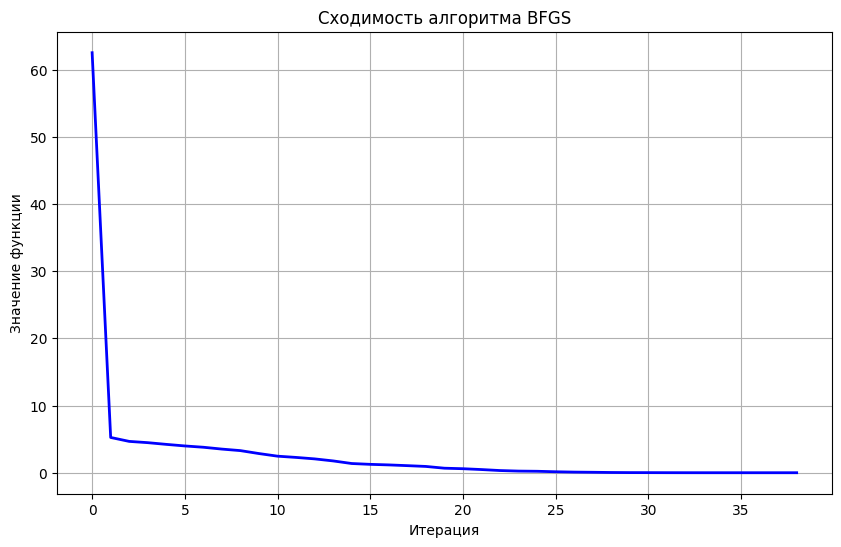

In [1]:
import numpy as np
from scipy.optimize import line_search

def bfgs(f, grad_f, x0, max_iter=1000, tol=1e-6):
    """
    Реализация алгоритма BFGS

    Параметры:
    f - целевая функция
    grad_f - функция, вычисляющая градиент
    x0 - начальная точка
    max_iter - максимальное число итераций
    tol - критерий остановки по норме градиента
    """
    n = len(x0)
    H = np.eye(n)  # Начальная аппроксимация обратной матрицы Гессе
    x = x0.copy()
    grad = grad_f(x)
    grad_norm = np.linalg.norm(grad)

    history = {'x': [], 'f': [], 'grad_norm': []}

    for k in range(max_iter):
        history['x'].append(x.copy())
        history['f'].append(f(x))
        history['grad_norm'].append(grad_norm)

        # Критерий остановки
        if grad_norm < tol:
            break

        # Направление поиска
        p = -H.dot(grad)

        # Линейный поиск
        alpha, _, _, new_f, new_grad, _ = line_search(f, grad_f, x, p, grad)
        if alpha is None:
            alpha = 1.0  # Если линейный поиск не удался, используем шаг по умолчанию

        # Обновление точки
        s = alpha * p
        x_new = x + s
        grad_new = grad_f(x_new)
        y = grad_new - grad

        # Обновление матрицы H
        rho = 1.0 / y.dot(s)
        I = np.eye(n)
        H = (I - rho * np.outer(s, y)).dot(H).dot(I - rho * np.outer(y, s)) + rho * np.outer(s, s)

        # Переход к следующей итерации
        x = x_new
        grad = grad_new
        grad_norm = np.linalg.norm(grad)

    return x, history

# Пример использования
def rosenbrock(x):
    """Функция Розенброка - тестовая функция для оптимизации"""
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def grad_rosenbrock(x):
    """Градиент функции Розенброка"""
    return np.array([
        -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0]),
        200 * (x[1] - x[0]**2)
    ])

# Начальная точка
x0 = np.array([-1.5, 1.5])

# Оптимизация с помощью BFGS
x_opt, history = bfgs(rosenbrock, grad_rosenbrock, x0)

print(f"Найденный минимум: {x_opt}")
print(f"Значение функции в минимуме: {rosenbrock(x_opt)}")
print(f"Количество итераций: {len(history['f'])}")

# Визуализация
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history['f'], 'b-', linewidth=2)
plt.xlabel('Итерация')
plt.ylabel('Значение функции')
plt.title('Сходимость алгоритма BFGS')
plt.grid(True)
plt.show()